In [1]:
%pylab inline
import numpy as np
import seaborn as sns

from scipy.stats import norm, t

Populating the interactive namespace from numpy and matplotlib


# A/B Test Example

바로 예제를 갖고서 설명을 하겠습니다.

| Variation | Conversion | View | Conversion Rate | SE | Confidence Interval |  Change | Confidence | 
|:----------|:-----------|:-----|:----------------|:---|:--------------------|:--------|:-----------|
| Variation A (Control Group) | 330 | 1093 | 30.19% | 0.0138 | $ \pm 2.72 $ % | - | - |
| Variation B (Test Group)    | 385 | 1123 | 34.28% | 0.0141 | $ \pm 2.77 $ % | 13.54% | |

* 95% confidence level을 사용 ( $ \alpha = 0.95 $ )
* 두 그룹간의 차의 z-score는 6.6663

# Conversion Rate 

각각의 variation마다 conversion rate를 다음과 같이 계산 할  수 있습니다.

$$ \text{conversion rate} = p = \frac{\text{event count}}{\text{view count}} $$

위의 A/B Text를 예로 든다면..

$$ \begin{align} 
p_a &= \frac{330}{1093} = 0.3019213174748399  \\
p_b &= \frac{385}{1123} = 0.3428317008014248
\end{align} $$



# Change 

Variation A 그리고 variation B가 얼마나 변화 되었는지는 다음의 공식으로 계산 합니다.

$$ Change = \frac{p_b - p_a}{p_a} = \frac{p_b}{p_a} - 1 $$

# Standard Error 


## Formula

The standard deviation of the sample mean 을 standard error라고 합니다.<br>
쉽게 말해서 population을 말할때는 standard deviation이라고 말하고, sample에 관해서 말할때는 standard error 를 사용합니다. 

$$ SE = \sigma_{\bar{x}} = \sqrt{\frac{p(1-p)}{n}} $$

* $ p $ : conversion rate
* $ n $ : sample size (view)

위의 예를 든다면 다음과 같습니다. 

$$ \begin{align} 
SE_{a} &= \sqrt{\frac{0.3019 * (1-0.3019)}{1093}} = 0.013886378416134985 \\
SE_{b} &= \sqrt{\frac{0.3428 * (1-0.3428)}{1123}} = 0.014164097619600914 \\
\end{align} $$





## Explained

베르누이 분포는  $ P(X=1) = p $ 그리고 $ P(X=0) = (1-p) $ 와 같이 오직 두가지 가능한 결과가 일어난다고 했을때 사용되는 분포입니다.<br>

$$ X \sim \mathcal{Bernoulli} (p) $$

여기서 p는 variation의 conversion rate를 가르킵니다.<br>
이때 mean, variance 그리고 standard deviation 다음과 같습니다. 

$$ \begin{align} 
E[X] &= p \\
\sigma^2 &= p(1-p) \\
\sigma &= \sqrt{p(1-p)}
\end{align} $$

Central limit theorem에 따르면 다수의 표본 평균을 계산함으로서 모평균을 추정할 수 있습니다.<br>
즉 표본평균으로 나온 $ p $ 의 분포는 정규분포를 따르며, 
standard deviation of the population $ \sigma $는 표본평균의 표준오차 (the standard error of the sample mean) 와 동일합니다.<br>
The standard deviation of the sample mean 의 공식은 아래와 같습니다. (베르누이 분포에 대해서..)

$$ \sigma_{\bar{x}} = \frac{s}{\sqrt{n}} = \frac{\sqrt{p(1-p)}}{\sqrt{n}} = \sqrt{\frac{p(1-p)}{n}} $$

추가적으로 $ p $ 는 정규분포를 따름으로 다음과 같이 정의할수 있습니다.

$$ \hat{p} \sim \mathcal{Normal} \left(u=p, \sigma= \sqrt{\frac{p(1-p)}{n}} \right) $$

**아주쉽게 말하면, 표본 평균의 standard error는 표본이 따르는 정규분포의 1 standard deviation이라고 말할 수 있습니다.**




[A] n:1093 | conversion: 0.3019 | standard error: 0.01389
[B] n:1123 | conversion: 0.3428 | standard error: 0.01416


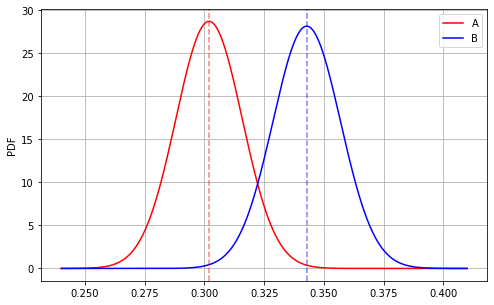

In [162]:
import numpy as np
from scipy.stats import norm


def standard_error(n, p):
    return np.sqrt(p * (1 - p) / n)


n_a = 1093
n_b = 1123
p_a = 330/n_a
p_b = 385/n_b

se_a = standard_error(n_a, p_a)
se_b = standard_error(n_b, p_b)

print(f'[A] n:{n_a} | conversion: {p_a:6.4} | standard error: {se_a:6.4}')
print(f'[B] n:{n_b} | conversion: {p_b:6.4} | standard error: {se_b:6.4}')


# Visualization
rv_a = norm(loc=p_a, scale=se_a)
rv_b = norm(loc=p_b, scale=se_b)

x = np.linspace(0.24, 0.41, 1000)

fig, ax = subplots(figsize=(8, 5))
sns.lineplot(x, rv_a.pdf(x), color='red', label='A')
sns.lineplot(x, rv_b.pdf(x), color='blue', label='B')
ax.axvline(x=p_a, c='red', alpha=0.5, linestyle='--')
ax.axvline(x=p_b, c='blue', alpha=0.5, linestyle='--')
plt.ylabel('PDF')
plt.grid()

# Confidence Interval for Bernoulli Distribution

## Formula


standard error를 알고 있을 경우 confidence interval (신뢰구간)의 공식은 다음과 같습니다.

$$ \begin{align} CI &= p \pm Z_{a/2} * \sigma_{\bar{x}} \\
&= p \pm Z_{a/2} \sqrt{ \frac{p(1-p)}{n} } 
\end{align} $$

* p : Conversion rate (the mean of the bernoulli distribution)
* n : sample size
* $ Z_{1-a/2} $ : Z value of the standard deviation
* $ Z_{1-a/2} = 1.96 $ for 95% confidence ( $ \alpha = 0.05 $ )
* $ Z_{1-a/2} = 2.57 $ for 99% confidence ( $ \alpha = 0.01 $ )

| Confidence Level | Python                    | Python           | $ Z_a $ Value | 
|:-----------------|:--------------------------|:-----------------|:--------|
| 80% 신뢰수준       | norm.ppf(1 - (1-0.8)/2)   | norm.ppf(0.9)    | 1.2815  |
| 85% 신뢰수준       | norm.ppf(1 - (1-0.85)/2)  | norm.ppf(0.925)  | 1.4395  |
| 90% 신뢰수준       | norm.ppf(1 - (1-0.9)/2)   | norm.ppf(0.95)   | 1.6448  |
| 95% 신뢰수준       | norm.ppf(1 - (1-0.95)/2)  | norm.ppf(0.975)  | 1.9599  |
| 99% 신뢰수준       | norm.ppf(1 - (1-0.99)/2)  | norm.ppf(0.995)  | 2.5782  |
| 99.5% 신뢰수준     | norm.ppf(1 - (1-0.995)/2) | norm.ppf(0.9975) | 2.8070  | 
| 99.9% 신뢰수준     | norm.ppf(1 - (1-0.999)/2) | norm.ppf(0.9995) | 3.2905  |


예를 들어서 34.28% conversion rate 그리고 95% 신뢰수준의 confidence interval은 다음과 같이 계산합니다.


$$ \begin{align} CL_A &= 0.3428 \pm 1.9599  \sqrt{ \frac{0.3428 ( 1- 0.3428)}{1123} } \\
&= 34.28\% \pm 2.7\%
\end{align} $$

> norm.ppf 는 N(0, 1)인 표준정규분포에서 0에서부터 95%까지의 면적에 대한 확률을 norm.ppf(0.975)로 계산할 수 있습니다.<br>
> 즉 norm.ppf(0.5) = 0 입니다.

## Z-Score & Z Table

population mean (모평균) 그리고 population standard deviation (모표준편차)을 알고 있으며 sample size가 30개 이상인 경우에는 standard score는 다음과 같이 계산합니다.

$$ z = \frac{x - \mu}{\sigma} $$

* $ \mu $ : the mean of the population
* $ \sigma  $ : the standard devistion of the population
* $ z $ : 모평균에서 표준편차로 얼마나 떨어져 있는지를 나타내며, negative라면 평균보다 작고, positive이면 평균보다 크다는 의미


현실적으로 population mean 그리고 population standard deviation을 알고 있는 경우는 특이 많이 없습니다.<br>
이 경우 sample mean 그리고 sample standard deviation을 사용해서 standard score를 계산할 수 있습니다.

$$ z = \frac{x - \bar{x}}{s} $$

$$ s = \frac{\sigma}{\sqrt{n}} $$

$$ s^2 = \frac{\sigma^2}{n} $$

* $ \bar{x} $ : the mean of the sample
* $ s $ : the standard deviationn of the sample


Z-Score를 계산했다면, unit normal distribution(mean=0, std=1)에서 해당 Z-Score까지의 면적에 대한 확률을 표준정규분포표를 통해서 확인을 할 수 있습니다.

> [표준정규분포표](https://www.mathsisfun.com/data/standard-normal-distribution-table.html)는 표준정규분포(mean=0, std=1)에서 0에서부터 Z까지의 확률을 나타낸 것입니다. <br>
> ![](images/ab_unit_normal_table.png)


## Bernoulli Distribution 

Population이 $ X_i^{iid} \sim Bernoulli(p) $ 를 따를때 위에서 언급했듯이 mean, variance, standard deviation은 다음과 같습니다.

* mean: $ \mu = E[X] = p $ 
* variance: $ \sigma^2 = Var(X) = p(1-p) $ 
* std: $ \sigma = Std(X) = \sqrt{p(1-p)} $ 
* $ p $ : $ x \in [1, 0] $ 을 따를때 1일 확률. 즉 1을 선택할 확률 <- 우리가 알아내고자 하는 estimator값 
* 더 쉽게 이야기 하면 p는 conversion rate이다  

Central Limit Theorem에 따르면 the mean of the sample means 그리고 the standard deviation of the sample means는 다음과 같습니다.<br>



> $ \begin{align} \text{the mean of the sample means } &= \mu_{\bar{x}} = \mu = p \\
\text{the standard deviation of the sample means} &= \sigma_{\bar{x}} = \frac{s}{\sqrt{n}} = \sqrt{\frac{p(1-p)}{n}}
\end{align} $ <br>

* 쉽게 말해 표본평균의 평균은 모평균을 따른다 
* 표본평균 $ p $ 의 분포는 정규분포를 따른다 (central theorem) 
* standard deviation $ \sigma $ 는 standard error of the mean (standard error)과 동일하다 

따라서 다음과 같이 정의할 수 있습니다.

$$ \hat{p}   \sim \mathscr{N} \left(\mu=p, \sigma= \sqrt{\frac{p(1-p)}{n}} \right) $$



## Confidence Interval

목표는 표본평균값이 $ p $ 모평균 $ \mu $ 안에 95%의 확률로 confidence interval안에 포함되는 것을 구하고자 합니다.<br>
즉 100번의 표본 평균을 구했을때 해당 평균이 95번 신뢰구간안에 포함되는 확률을 구하고자 합니다.

$$  (p - 1.96 * SE ,\ p + 1.96 * SE ) $$

* $ p $ : sample mean
* $ SE $ : standard error 
* $ 1.96 $ : critical value for 95% confidence level

즉 평균값 $ p $ 를 중심으로 플러스 마이너스 표준편차 * critical value (1.96)을 함으로서 95%안에 들어올 구간을 정하는 것입니다.<br>
Bernoulli distribution에 대한 Confidence Interval의 공식은 다음과 같습니다.


$$ \begin{align} CI &= \bar{x} \pm Z_{\alpha/2} \frac{s}{\sqrt{n}}   \\
&= \bar{x} \pm Z_{\alpha/2} \sqrt{\frac{p(1-p)}{n}}
\end{align} $$

Confidence interval을 계산하기 전에 먼저 confidence coefficient $ Z_{\alpha/2} $ (**신뢰계수**) 를 계산해야 합니다.<br> 


$$ \text{confidence coefficient} = Z_{\alpha/2} $$

* $ \alpha $ : significance level (유의수준) -> 0.05 같은 값을 사용 (H0의 확률)
* $ \alpha/2 $ : 정규분포의 양쪽에서 유의수준을 보기 때문에 2로 나눈다
* $ Z_{\alpha/2} $ : 임계값. 예를 들어 95% 신뢰도는 $ 1 - \alpha =  0.95\ (\alpha = 0.05) $ 이고, 2로 나누면 $ (1 - \alpha)/2 =  0.475 $  가 됩니다. <br>표준정규분포에서 47.5%의 확률에 해당하는 z-value는 1.96을 확인 할 수 있습니다. <br>즉 0에서 시작해서 우측으로 47.5% 면적에 해당하는 확률의 z-value가 1.96이라는 뜻입니다.


공식에 대한 유도는 다음과 같습니다.


![](images/ab_confidence_interval.png)

$$ Z = \frac{p - \bar{x}}{s/\sqrt{n}} \sim N(0, 1) $$ 

$$ \begin{align} 
1 - \alpha &=  P(-Z_{\alpha/2} \le Z \le Z_{\alpha/2}) \\
&= P(-Z_{\alpha/2} \le \frac{p - \bar{x}}{s/\sqrt{n}} \le Z_{\alpha/2}) \\
&= P(-Z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} \le p - \bar{x} \le Z_{\alpha/2} \cdot \frac{s}{\sqrt{n}}) \\
&= P(-p -Z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} \le - \bar{x} \le -p +  Z_{\alpha/2} \cdot \frac{s}{\sqrt{n}}) \\
&= P( p +Z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} \ge \bar{x} \ge p - Z_{\alpha/2} \cdot \frac{s}{\sqrt{n}}) \\
&= P( p - Z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} \le \bar{x} \le p +Z_{\alpha/2} \cdot \frac{s}{\sqrt{n}}) \\
\end{align} $$ 


따라서 샘플 평균 $ \bar{x} $ 에 대한  $ 100 (1 - \alpha) $ % confidence interval 은 다음과 같습니다.

$$ \begin{align} \text{confidence interval} &= p \pm Z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} \\
&= p \pm Z_{\alpha/2} \cdot \sqrt{\frac{p(1-p)}{n}}
\end{align} $$


* 95% Confidence Interval ( $ \alpha = 0.05 $ ) : $ Z_{\alpha/2} = Z_{0.025} = 1.96 $
* 99% Confidence Interval ( $ \alpha = 0.01 $ ) : $ Z_{\alpha/2} = Z_{0.005} = 2.575 $




In [109]:
from scipy.stats import t, norm

n_interval = norm.interval(0.95, loc=p_a, scale=se_a)
t_interval = t.interval(0.95, n_a, loc=p_a, scale=se_a)

print(f'CI with norm | left: {n_interval[0]:.4} right: {n_interval[1]:.4}')
print(f'CI with t    | left: {t_interval[0]:.4} right: {t_interval[1]:.4}')

CI with norm | left: 0.2747 right: 0.3291
CI with t    | left: 0.2747 right: 0.3292


In [95]:
def standard_error(n, p):
    return np.sqrt(p * (1 - p) / n)

def confidence_interval(n, p, alpha=0.05):
    se = standard_error(n, p)
    margin_error = norm.ppf(1-alpha/2) * se
    return margin_error
    
z_a = confidence_interval(n_a, p_a)
z_b = confidence_interval(n_b, p_b)

print('[A]')
print('95% confidence level | Z:', norm.ppf(1-0.05/2))
print(f'CI with norm: z-value: {z_a:.4} | left: {p_a - z_a:.4} | right: +{p_a + z_a:.4}')
print(f'confidence interval: {p_a*100:5.4}% +-{z_a*100:<.4}%')

print('\n[B]')
print('95% confidence level | Z:', norm.ppf(1-0.05/2))
print(f'CI with norm: z-value: {z_b:.4} | left: {p_b - z_b:.4} | right: +{p_b + z_b:.4}')
print(f'confidence interval: {p_b*100:5.4}% +-{z_b*100:<.4}%')

[A]
95% confidence level | Z: 1.959963984540054
CI with norm: z-value: 0.02722 | left: 0.2747 | right: +0.3291
confidence interval: 30.19% +-2.722%

[B]
95% confidence level | Z: 1.959963984540054
CI with norm: z-value: 0.02776 | left: 0.3151 | right: +0.3706
confidence interval: 34.28% +-2.776%


# Significance Test


$$ CI_{a,b} = p_b - p_a \pm Z_{\alpha/2}  \sqrt{ \frac{p_a(1-p_a)}{n_a} + \frac{p_b(1-p_b)}{n_b} } $$


1. T Test (Student T test)
2. Z Test
3. ANOVA Test 
4. Chi-Square Test


## Basic Math for Bernoulli Distribution

> **Variance Ruls**<br>
> $ Var(X + Y) = Var(X) + Var(Y) = \sigma^2_X + \sigma^2_Y $ <br>
> $ Var(X - Y) = Var(X) + Var(Y) = \sigma^2_X + \sigma^2_Y $ <br>


> **두 분포간의 차이**<br>
> 두 분포간의 차이는 두 분포의 평균값의 거리라고 보면 됩니다. <br>
> $ \hat{d} = p_b - p_a $



따라서 the difference of the two normal distributions의 variacne 그리고 standard deviation은 다음과 같습니다.

$$ \begin{align} Var(\hat{d}) &= Var(p_b - p_a) \\
&= Var(p_a) + Var(p_b) \\
&= \frac{s^2_a}{n} + \frac{s^2_b}{n} \\
&= \frac{p_a(1-p_a)}{n_a} + \frac{p_b(1-p_b)}{n_b}
\end{align} $$


$$ \begin{align} Std(\hat{d}) &= \sqrt{Var(d)}  \\
&= \sqrt{\frac{s^2_a}{n_a} + \frac{s^2_b}{n_b}} \\
&= \sqrt{\frac{p_a(1-p_a)}{n_a} + \frac{p_b(1-p_b)}{n_b}}
\end{align} $$





## Satterwaite Approximation and Pooled Standard Error 


$$ \begin{align} \text{satterwaite} &=  \sqrt{\frac{s^2_a}{n_a} + \frac{s^2_b}{n_b}}  \\
\text{pooled standard error} &= Sp \sqrt{\frac{1}{n_a} + \frac{1}{n_b}}
\end{align} $$


* [새터스웨이트](https://m.blog.naver.com/PostView.nhn?blogId=bloomingds&logNo=221249601283&proxyReferer=https%3A%2F%2Fwww.google.com%2F)는 독립표본 검정 (두 집단 간에 평균이 차이가 있는지 검증하는 분석)으로서 모분산이 같지 않을 경우에 사용합니다.
* [Pooled Standard Error](https://www.statisticshowto.datasciencecentral.com/find-pooled-sample-standard-error/)는 사실상 satterwaite와 동일하다고 보면 됩니다. 다만 pooled standard error의 경우 두 분포는 동일하다고 가정을 합니다.
* $ s^2 $ : standard deviation from the sample. $ s^2 $ 는 variance.


Pooled standard error를 통해서 두 그룹간의 standard deviation을 계산한다면 다음과 같습니다.


$$ \begin{align} Std(\hat{d}) &= \sqrt{Var(\hat{d})} &[1] \\
&= \sqrt{\frac{s^2_p}{n_a} + \frac{s^2_p}{n_b}} & [2] \\
&= \sqrt{s^2_p \left( \frac{1}{n_a} + \frac{1}{n_b} \right)} &[3] \\
&= \sqrt{ \hat{P}_p \left(1-\hat{P}_p\right) \left( \frac{1}{n_a} +  \frac{1}{n_b} \right)}  &[4] \\
\end{align} $$


$$ \hat{P}_p = \frac{p_a n_a +  p_b n_b}{n_a + n_b} $$



## Hypothesis Analysis

Null hypothesis(귀무가설)은 두 그룹간의 차이는 0으로 가정을 하며, <br>
alternate hypothesis(대립가설)은 confidence interval 밖으로 존재한다고 가정을 합니다. <br>

> **일반적인 hypothesis test**<br>
> $ H_0 : \hat{d} = 0 $ <br>
> $ H_1 : \hat{d} \ne 0 $ <br>
> $ \hat{d} \sim N(0, \sigma_{\bar{x}}) $

> **Significance Test의 hypothesis test**<br>
> $ A \sim N( $

$$ Var(d) = Var(p_b - p_a) = Var(p_a) + Var(p_b) = \frac{p_a(1-p_a)}{n_a} + \frac{p_b(1-p_b)}{n_b} $$


In [253]:
def get_power(n, p1, p2, cl):
    alpha = 1 - cl
    qu = stats.norm.ppf(1 - alpha/2)
    diff = abs(p2-p1)
    bp = (p1+p2) / 2
    
    v1 = p1 * (1-p1)
    v2 = p2 * (1-p2)
    bv = bp * (1-bp)
    
    power_part_one = stats.norm.cdf((n**0.5 * diff - qu * (2 * bv)**0.5) / (v1+v2) ** 0.5)
    power_part_two = 1 - stats.norm.cdf((n**0.5 * diff + qu * (2 * bv)**0.5) / (v1+v2) ** 0.5)
    
    power = power_part_one + power_part_two
    
    return (power)

get_power(n_a + n_b, p_a, p_b, 0.95)

0.8300939242244653

In [250]:
p_p = (p_a * n_a + p_b * n_b)/(n_a + n_b)

sigma = np.sqrt(p_p*(1-p_p) * (1/n_a + 1/n_b))

norm.cdf((p_b - p_a)/sigma)

0.980279817658476

## Two-Sample Z-Test 

**Confidence Interval**

$$ \frac{(\bar{p}_a - \bar{p}_b) - d}{\frac{}{}} $$

아래코드의 예제는 다음과 같습니다.<br>
2개의 신약을 개발하였고 A 와 B로 나눠서 테스트를 하고자 합니다.<br>
기존 A약은 275명중에 127명에게 효과가 나타났습니다.<br>
신약 B약은 291명중에 388명에게 효과가 나타났습니다.<br>
5% 유의수준을 갖을때 A와 B와 차이가 있는지 

In [229]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import CompareMeans as cpm


dn_a = 275  
dn_b = 591
dc_a = 127
dc_b = 388

def z_test2(n1, n2, c1, c2, d=0):
    p1 = c1/n1
    p2 = c2/n2
    p_hat = (c1+c2)/(n1+n2)
    
    return ((p2 - p1) - d)/np.sqrt(p_hat*(1-p_hat) * (1/n1 + 1/n2))


z_result = z_test2(dn_a, dn_b, dc_a, dc_b)
z_score = z_score = norm.ppf(1-0.05/2)

print('z_result:', z_result)
print('z_score in 95% confidence level:', z_score)
print('rejectable:', z_result > z_score)

z_result: 5.432745204714066
z_score in 95% confidence level: 1.959963984540054
rejectable: True


## One Sample T-Test 


In [154]:
from scipy.stats import ttest_1samp


ages = np.random.normal(loc=30, scale=5, size=2000)

ttest_1samp(ages, 30)

Ttest_1sampResult(statistic=0.7247551438228504, pvalue=0.4686870794379019)

In [132]:
from scipy.stats import t, norm

n_interval = norm.interval(0.95, loc=p_a, scale=se_a)
t_interval = t.interval(0.95, n_a, loc=p_a, scale=se_a)

print(f'CI with norm | left: {n_interval[0]:.4} right: {n_interval[1]:.4}')
print(f'CI with t    | left: {t_interval[0]:.4} right: {t_interval[1]:.4}')

CI with norm | left: 0.2747 right: 0.3291
CI with t    | left: 0.2747 right: 0.3292


In [136]:
def confidence_interval_for_two(n, p, alpha):
    mean = p_b - p_a
    var = (p_a * (1-p_a)/n_a) + (p_b * (1-p_b)/n_b)
    std = np.sqrt(var)
    
    z_critical = norm.ppf(1-alpha/2) * std
    
    return mean, var, std, z_critical


lift_mean, lift_var, lift_std, z_critical = confidence_interval_for_two(n_a, p_a, 0.95)

print(f'lift mean  : {lift_mean:.4}')
print(f'lift var   : {lift_var:.4}')
print(f'lift std   : {lift_std:.4}')
print(f'z critical : {z_critical}')

lift mean  : 0.04091
lift var   : 0.0003935
lift std   : 0.01984
z critical : 0.0012438299464464645


# Significance Test (Power Function)

그래서 결론적으로 A와 B 둘중에 누가 승자인지 정확하게 알고자 할때 Z-Score를 사용합니다.

$$ Z = \frac{CR_B - CR_A}{\sqrt{ SE^2_A + SE^2_B}} $$

위의 예로 든다면..

$$ Z = \frac{0.4372 - 0.3019}{0.0138^2 + 0.0148^2} = 6.6662 $$






# Calculating P-Value

Z-score값이 양수라고 가정했을때, Pp-value는 standard normal distribution에서 Z-score면접 이후의 부분입니다. 

![](images/ab-p-value.png)


In [6]:
p_value = norm.cdf(6.6662)
print('p-value:', p_value)
print('Statistical Power:', )

p-value: 0.9999999999868744
Statistical Power:


# Null Hypothesis vs Alternate Hypothesis

귀무가설(null hypothesis)는 의미있는 차이가 없는 경위 가설이며, 같은 모집단에서 뽑힌 두개의 집단인 경우 평균, 분산, 분포는 모두 같다고 가정을 합니다. 귀무가설 설정을 통해서 우연히 발생할 사건이 아닌 통계정 유의성을 갖고 있다는 것을 시험해 볼 수 있습니다.

A/B 테스트에서 귀무가설은 두 집단 A 그리고 B는 차이가 없다고 가정을 하며(평균, 분산, 분포), 다음과 같이 정의 할 수 있습니다.

> 참고사항으로 variance의 속성중에 다음이 있습니다. <br>
> $ Var(X + Y) = Var(X) + Var(Y) $ <br>
> $ Var(X - Y) = Var(X) + Var(Y) $


$$ \hat{d} = CR_B - CR_A $$

$$ \begin{align} 
Var(\hat{d}) &= Var(CR_B - CR_A)  \\
&= Var(CR_a) + Var(CR_B)  \\
&= \frac{CR_A ( 1- CR_A)}{n_A} + \frac{CR_B ( 1- CR_B)}{n_B} \\
&= \frac{s^2_A}{n_A} + \frac{s^2_B}{n_B} \\
\end{align} $$

따라서 standard deviation은 다음과 같습니다. 

$$ \begin{align} 
\sigma &= \sqrt{Var(\hat{d})} \\
&= \sqrt{\frac{CR_A ( 1- CR_A)}{n_A} + \frac{CR_B ( 1- CR_B)}{n_B}} \\
&= \sqrt{ SE_A^2 + SE_B^2}
\end{align} $$


> 참고사항으로 Bernoulli distribution의 속성은 다음과 같습니다. <br>
> - $ E[X] = p $ : expected value <br>
> - $ Var[X] = p(1-p) $ : variance <br>
> - $ Std[X] = \sqrt{p(1-p)} $ : standard deviation <br>
> - $ \sigma_{\bar{x}} = \frac{s}{\sqrt{n}} = \frac{\sqrt{p(1-p)}}{\sqrt{n}} $ : the standard deviation of the sample mean


Z score는 다음과 같습니다. 

$$ Z = \frac{CR_B - CR_A}{\sqrt{ SE^2_A + SE^2_B}} $$

즉 Z score는 control group과 test variation 평균값들 사이의 standard deviations의 갯수라고 생각하면 됩니다. 

이후 **P-value**를 계산해야 합니다.<br>
Python에서는 다음과 같이 합니다.

```
p_value = 1 - norm.cdf(z-score)
```


5%의 신뢰수준의 값과 p-value를 비교하여 p_value < 0.05 라면 test variation이 control variation보다 더 좋다는 결론을 얻을 수 있습니다.

In [7]:
def standard_error(n, p):
    return np.sqrt(p * (1-p)/n)

a_n = 1093
b_n = 1123
a_conversion = 330/a_n
b_conversion = 377/b_n

print('A standard error:', standard_error(a_n, a_conversion))
print('B standard error:', standard_error(b_n, b_conversion))

A standard error: 0.013886378416134985
B standard error: 0.014091929261457048


In [8]:
https://towardsdatascience.com/the-math-behind-a-b-testing-with-example-code-part-1-of-2-7be752e1d06f
http://www.ams.sunysb.edu/~zhu/ams571/Lecture11_571.pdf

SyntaxError: invalid syntax (<ipython-input-8-305332ac2821>, line 1)